<a href="https://colab.research.google.com/github/ejini6969/Optimization-Deep-Learning-ODL-/blob/main/DNN_grid_search_(Lab_8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from keras.datasets import mnist

# Loading the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [14]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [19]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical

# Flattening the images from the 28x28 pixels to 784 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

In [16]:
# range of pixel between 0 - 255

# normalizing the dataset to help with training
X_train /= 255
X_test /= 255

In [17]:
# One-hot encoding
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
print("Shape before one-hot encoding: ", y_train.shape)
print("Shape after one-hot encoding: ", Y_train.shape)

# 0 - 9 added after one-hot encoding

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [21]:
# Building a linear stack of layers with the sequential model

L1 = 200
L2 = 100
L3 = 50

# this uses grey scale, if RGB (colored) image, input_dim must be 28 * 28 * 3
model = Sequential()
model.add(Dense(L1, input_dim = 28 * 28, activation = 'relu'))
model.add(Dense(L2, activation = 'relu'))
model.add(Dense(L3, activation = 'relu'))

In [22]:
# Output layer (Softmax = multinominal)
model.add(Dense(10, activation = 'softmax')) # has 10 categorial vales (0 - 9)

In [23]:
# compiling the sequential model
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

In [24]:
# training the model for 10 epochs
history = model.fit(X_train, Y_train, epochs = 10, batch_size = 100, validation_data = (X_test, Y_test))

Epoch 1/10
600/600 [==============================] - 7s 8ms/step - loss: 0.2802 - accuracy: 0.9177 - val_loss: 0.1180 - val_accuracy: 0.9632
Epoch 2/10
600/600 [==============================] - 4s 7ms/step - loss: 0.1061 - accuracy: 0.9675 - val_loss: 0.0925 - val_accuracy: 0.9714
Epoch 3/10
600/600 [==============================] - 5s 9ms/step - loss: 0.0698 - accuracy: 0.9782 - val_loss: 0.0937 - val_accuracy: 0.9705
Epoch 4/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0537 - accuracy: 0.9830 - val_loss: 0.0771 - val_accuracy: 0.9772
Epoch 5/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0410 - accuracy: 0.9867 - val_loss: 0.0856 - val_accuracy: 0.9736
Epoch 6/10
600/600 [==============================] - 5s 9ms/step - loss: 0.0312 - accuracy: 0.9898 - val_loss: 0.0737 - val_accuracy: 0.9798
Epoch 7/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0262 - accuracy: 0.9915 - val_loss: 0.0780 - val_accuracy: 0.9771
Epoch 

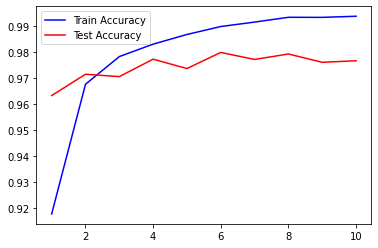

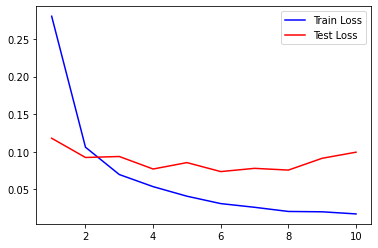

In [31]:
import matplotlib.pyplot as plt

acc2 = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss2 = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc2) + 1)

plt.plot(epochs, acc2, 'b', label = 'Train Accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Test Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss2, 'b', label = 'Train Loss')
plt.plot(epochs, val_loss, 'r', label= 'Test Loss')
plt.legend()
plt.show()

## Grid Search Hyperparameters

In [27]:
pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

In [32]:
# Function to create model, required for KerasClassifier
def create_model():
  # create model
  model5 = Sequential()
  model5.add(Dense(200, input_dim = 28 * 28, activation = 'relu'))
  model5.add(Dense(100, activation = 'relu'))
  model5.add(Dense(50, activation = 'relu'))
  model5.add(Dense(10, activation = 'softmax'))

  #compile model
  model5.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
  return model5

Tune

In [33]:
# create model
model5 = KerasClassifier(model = create_model, verbose = 0)

# define grid search parameters
batch_size = [100, 125]
epochs = [10, 15, 20]
param_grid = dict(batch_size = batch_size, epochs = epochs)
grid = GridSearchCV(estimator = model5, param_grid = param_grid, n_jobs = -1, cv = 3)
grid_result = grid.fit(X_train, Y_train)

By setting verbose 0, 1 or 2 just say how do you want to 'see' the training progress for each epoch. verbose = 0 will  show you nothing (silent).

n_jobs = -1 means using using all processors. This means that the n_jobs parameter can be used to distribute and exploit all the CPUs avaialble in the local computer

In [35]:
# summarize results
print("Best: %f using %s" %(grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" %(mean, stdev, param))

Best: 0.974800 using {'batch_size': 125, 'epochs': 20}
0.970333 (0.001274) with: {'batch_size': 100, 'epochs': 10}
0.969917 (0.002561) with: {'batch_size': 100, 'epochs': 15}
0.971983 (0.000811) with: {'batch_size': 100, 'epochs': 20}
0.973067 (0.001573) with: {'batch_size': 125, 'epochs': 10}
0.973100 (0.001937) with: {'batch_size': 125, 'epochs': 15}
0.974800 (0.001412) with: {'batch_size': 125, 'epochs': 20}


In [36]:
# create model
model5 = KerasClassifier(model = create_model, verbose = 0)

# define the grid search parameters
batch_size = [100, 128]
epochs = [10, 15, 20]
param_grid = dict(batch_size = batch_size, epochs = epochs)
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']

grid = GridSearchCV(estimator = model5, param_grid = param_grid,
                    n_jobs = -1, cv=3)
grid_result = grid.fit(X_train, Y_train)

## Tune the Neuron Activation Function

In [ ]:
# Function to create model, required for KerasClassifier
def create_model(activation = 'relu'):
  # create model
  model5 = Sequential()
  model5.add(Dense(50, input_dim = 28 * 28, activation = activation))
  model5.add(Dense(10, activation = 'softmax'))
  #compile model
  model5.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
  return model5

In [ ]:
# create model
model7 = KerasClassifier(model = create_model, epochs = 10, batch_size = 10, verbose = 0)
activation = ["softmax", "softplus", "softsign", "relu", "tanh", "sigmoid", "hard_sigmoid", "linear"]
param_grid = dict(model__activation = activation)
grid = GridSearchCV(estimator = model7, param_grid = param_grid,
                    n_jobs = -1, cv=3)
grid_result = grid.fit(X_train, Y_train)